# TAREA FINAL:
**Integrantes:**
- Jurianny Andica (2210703)    
- Michel Calderón (2210710)   
- Valentina Alfaro (2211702)   

El objetivo de la presente tarea es analizar el consumo de energia que gasta una casa situada en Sceaux a 7km de París, Francia durante el periodo de 11 meses (Enero a Noviembre) de 2010.   
   
Para lo anterior se define el siguiente flujo de trabajo:

1.   Importación de las librerías necesarias
2.   Lectura de archivos csv que contienen el registro de los datos
3.   Unión de los datos gracias a su factor común de **datatime** en un sola tabla general gracias al comando **.merge()**
4.   Re escala de la tabla global de datos del punto anterior con ayuda del comando **.resample()** para el primediado de datos cada día, semana y mes.
5.    Creación y graficación de relaciones entres los datos de las tablas para su análisis.

**PRIMERO:** Importación de librerías

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy.optimize import curve_fit,leastsq
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

 **SEGUNDO:** Lectura de archivos


In [27]:
dat1=pd.read_csv('Global_active_power.csv')

In [28]:
dat2=pd.read_csv('Global_intensity.csv')

In [29]:
dat3=pd.read_csv('Global_reactive_power.csv')

In [30]:
dat4=pd.read_csv('Voltage.csv')

**TERCERO:** creación de la tabla general de la unión de todos los datos   

Con ayuda del comando **.merge()** se unieron primero los datos de la energía activa y reactiva en la **tabla1** y luego la intensidad y el voltaje en la **tabla2**. Lo anterior se dió gracias al factor común del tiempo que contiene cada archivo de datos, heredándose este en las tablas 1 y 2 para hacer una unión final en la **tabla_global**

In [31]:
tabla1=pd.merge(dat1,dat2, how='outer', on= 'Datetime')
tabla2=pd.merge(dat3,dat4, how='outer', on= 'Datetime')
tabla_global = pd.merge(tabla1,tabla2, how='outer', on= 'Datetime')
tabla_global

,Datetime,Global_active_power,Global_intensity,Global_reactive_power,Voltage
0,2010-01-01 00:00:00,1.790,7.4,0.236,240.65
1,2010-01-01 00:01:00,1.780,7.4,0.234,240.07
2,2010-01-01 00:02:00,1.780,7.4,0.234,240.15
3,2010-01-01 00:03:00,1.746,7.2,0.186,240.26
4,2010-01-01 00:04:00,1.686,7.0,0.102,240.12
...,...,...,...,...,...
457390,2010-11-26 20:58:00,0.946,4.0,0.000,240.43
457391,2010-11-26 20:59:00,0.944,4.0,0.000,240.00
457392,2010-11-26 21:00:00,0.938,3.8,0.000,239.82
457393,2010-11-26 21:01:00,0.934,3.8,0.000,239.70


**CUARTO:** Uso del comando **.resample()**.

En la siguiente linea los datos de tiempo tuvieron que ser transformados al formato datetime para que la función **.resample()** pueda entenderlo.

In [32]:
tabla_global['Datetime'] = pd.to_datetime(tabla_global['Datetime'])
tabla_global = tabla_global.set_index("Datetime")

Después de tener todos los datos en una tabla, la columna de datetime ya no es necesaria en minutos así que es convertida juntos con los otros datos en promediados a una nueva escala por días. Esto se logra utilizando la función **.resample()**

In [33]:
escala_dias = tabla_global.resample("D").mean()
intensity_dias = escala_dias["Global_intensity"]
activ_dias = escala_dias["Global_active_power"]
reactiv_dias = escala_dias["Global_reactive_power"]
voltage_dias = escala_dias["Voltage"]
escala_dias

,Global_active_power,Global_intensity,Global_reactive_power,Voltage
Datetime,,,,
2010-01-01,0.850175,3.537083,0.114817,242.565722
2010-01-02,1.176235,4.857778,0.086656,243.631743
2010-01-03,0.901894,3.757778,0.090331,241.822778
2010-01-04,1.171833,4.879028,0.100322,241.754160
2010-01-05,0.916776,3.929861,0.133697,240.647167
...,...,...,...,...
2010-12-07,0.770538,3.397222,0.198550,240.218646
2010-12-08,0.367846,1.623750,0.117429,240.794931
2010-12-09,1.119508,4.755694,0.139832,241.619722


En los archivo de datos hacen faltan el registro de datos de ciertos días, por lo tanto con el **.dropna()** se eliminan estos valores vacíos.

In [34]:
dias_intensidad = intensity_dias.dropna()
dias_activ = activ_dias.dropna()
dias_voltage = voltage_dias.dropna()
dias_reactiv = reactiv_dias.dropna()

Además de la nueva escala por días, también se crean las escalas de datos por semanas y meses:

In [35]:
escala_semana = tabla_global.resample("W").mean()
intensity_semana = escala_semana["Global_intensity"]
activ_semana = escala_semana["Global_active_power"]
reactiv_semana = escala_semana["Global_reactive_power"]
voltage_semana = escala_semana["Voltage"]
escala_semana

,Global_active_power,Global_intensity,Global_reactive_power,Voltage
Datetime,,,,
2010-01-03,0.976101,4.050880,0.097268,242.673414
2010-01-10,0.920572,3.909127,0.127467,240.588849
2010-01-17,1.362677,5.659855,0.149743,243.906723
2010-01-24,1.535147,6.407362,0.132082,242.399567
2010-01-31,1.548028,6.427857,0.113202,242.941153
2010-02-07,1.011359,4.251478,0.127050,241.840780
2010-02-14,1.052733,4.395023,0.112926,242.393924
2010-02-21,1.427403,5.944028,0.095664,242.465328
2010-02-28,1.123678,4.692837,0.102724,241.364385


In [36]:
escala_mes = tabla_global.resample("M").mean()
intensity_mes = escala_mes["Global_intensity"]
activ_mes = escala_mes["Global_active_power"]
reactiv_mes = escala_mes["Global_reactive_power"]
voltage_mes = escala_mes["Voltage"]
escala_mes

,Global_active_power,Global_intensity,Global_reactive_power,Voltage
Datetime,,,,
2010-01-31,1.300640,5.430332,0.125182,242.338522
2010-02-28,1.157539,4.836624,0.109467,242.002101
2010-03-31,1.170015,4.920399,0.136368,241.475284
2010-04-30,1.036334,4.363496,0.129557,241.442527
2010-05-31,1.075957,4.551504,0.127221,241.296151
2010-06-30,0.975306,4.170282,0.145525,240.888985
2010-07-31,0.778947,3.337202,0.138093,240.965167
2010-08-31,0.929452,3.954423,0.130815,241.422944
2010-09-30,0.997541,4.223837,0.127700,241.267517


**QUINTO**: Creación y graficación de relaciones entres los datos de las tablas para su análisis con **.curve_fit()**

A continuación se presentan las relaciones 1 y 2 que describen a la **figura1** y la **figura2** dadas por las ecuaciones:

**Relación 1:** Global_active_power = $A_1$(Global intensity)+$B_1$   
**Relación 2:** Global_active_power = $A_2$(Voltage)+$B_2$

respectivamente, tomándose como base que son relaciones lineales, se construye la siguiente función que con ayuda de **.curve_fit()** será la función estándar que use el comando para poder encontrar las pendientes y sus puntos de corte.

In [37]:
def f(x, b, m):           
    return m*x + b

In [38]:
#Solución para los parámetros de la primera relación
relacion1_dias,cov1=curve_fit(f, dias_intensidad, dias_activ)
relacion1_semanas,cov2=curve_fit(f, intensity_semana, activ_semana)
relacion1_meses,cov3=curve_fit(f, intensity_mes, activ_mes)

#Impresión de las soluciones:
print(relacion1_dias)
print(relacion1_semanas)
print(relacion1_meses)

[-0.02753221  0.24305793]
[-0.0532641   0.24887312]
[-0.06067193  0.25042854]


In [39]:
#Solución para los parámetros de la segunda relación
relacion2_dias,cov4=curve_fit(f, dias_voltage, dias_activ)
relacion2_semanas,cov5=curve_fit(f, voltage_semana, activ_semana)
relacion2_meses,cov6=curve_fit(f, voltage_mes, activ_mes)

#Impresión de las soluciones:
print(relacion2_dias)
print(relacion2_semanas)
print(relacion2_meses)

[-6.10166907  0.0296603 ]
[-22.08501293   0.09582553]
[-40.67097826   0.17281052]


Una vez obtenidos los parámetros para las relaciones se graficaron los datos con su respectiva regresión lineal:

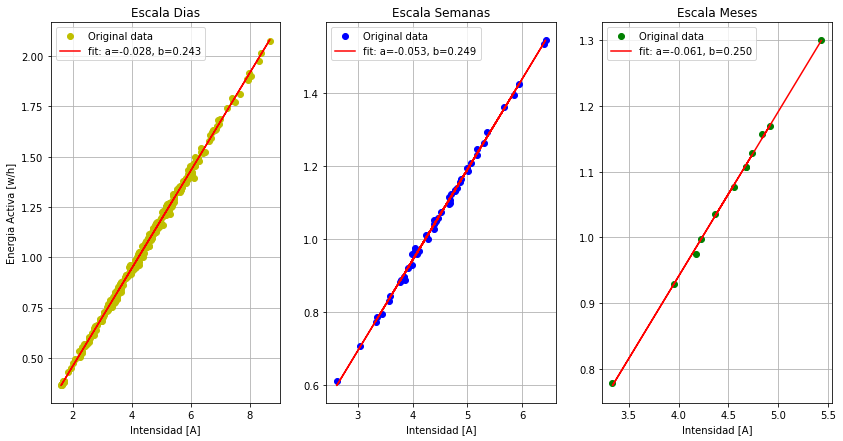

In [40]:
figura1 = plt.figure(figsize=(14, 7))

ax = figura1.add_subplot(131)
ax.set_title('Escala Dias')
ax.plot(dias_intensidad, dias_activ, 'yo', label='Original data')
plt.plot(dias_intensidad, f(dias_intensidad, -0.02753221,  0.24305793),
         'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(relacion1_dias))
ylabel('Energia Activa [w/h]')
xlabel('Intensidad [A]')
plt.grid()
plt.legend()

ax2 = figura1.add_subplot(132)
ax2.set_title('Escala Semanas')
ax2.plot(intensity_semana, activ_semana, 'bo', label='Original data')
ax2.plot(intensity_semana, f(intensity_semana, -0.0532641 ,  0.24887312),
         'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(relacion1_semanas))
xlabel('Intensidad [A]')
plt.grid()
plt.legend()

ax3 = figura1.add_subplot(133)
ax3.set_title('Escala Meses')
ax3.plot(intensity_mes, activ_mes, 'go', label='Original data')
ax3.plot(intensity_mes, f(intensity_mes, -0.06067193,  0.25042854),
         'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(relacion1_meses))
xlabel('Intensidad [A]')
plt.grid()
plt.legend()

plt.show()

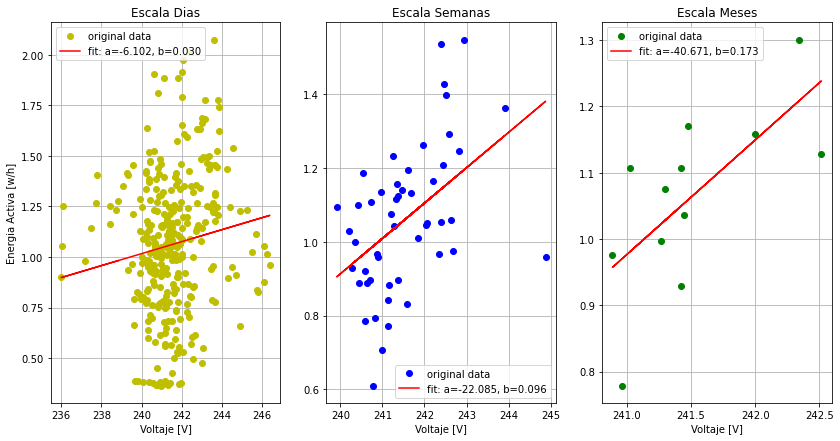

In [41]:
figura2 = plt.figure(figsize=(14, 7))

ax4 = figura2.add_subplot(131)
ax4.set_title('Escala Dias')
ax4.plot(dias_voltage, dias_activ, 'yo',label='original data')
ax4.plot(dias_voltage, f(dias_voltage,-6.10166907,  0.0296603 ),
         'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(relacion2_dias))
ylabel('Energia Activa [w/h]')
xlabel('Voltaje [V]')
plt.grid()
plt.legend()

ax5 = figura2.add_subplot(132)
ax5.set_title('Escala Semanas')
ax5.plot(voltage_semana, activ_semana, 'bo', label='original data')
ax5.plot(voltage_semana, f(voltage_semana,-22.08501293,   0.09582553),
         'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(relacion2_semanas))
xlabel('Voltaje [V]')
plt.grid()
plt.legend()

ax6 = figura2.add_subplot(133)
ax6.set_title('Escala Meses')
ax6.plot(voltage_mes, activ_mes, 'go',label='original data')
ax6.plot(voltage_mes, f(voltage_mes,-40.67097826,   0.17281052),
         'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(relacion2_meses))
xlabel('Voltaje [V]')
plt.grid()
plt.legend()

plt.show()

También se calcula el error de las regresiones lineales dadas por los datos.

In [122]:
def get_fit2(func,xdata,ydata,r):
    popt, pcov = curve_fit(func, xdata, ydata)
    popt, pcov = np.around(popt,r), np.around(np.sqrt(np.diag(pcov)),r)
    E=np.sqrt(np.mean((ydata-func(xdata, *popt))**2))
    print("Coeficients are : {}".format(popt))
    print("Sigma_Coeficients are : {}".format(pcov))
    print("Error on fit is ={}".format(E))
    return #popt, np.sqrt(np.diag(pcov))

In [123]:
#Errores en la primera relación para cada escala de tiempo
get_fit2(f,dias_intensidad, dias_activ,2)
get_fit2(f,intensity_semana, activ_semana,2)
get_fit2(f,intensity_mes, activ_mes,2)

Coeficients are : [-0.03  0.24]
Sigma_Coeficients are : [0. 0.]
Error on fit is =0.022630442847155905
Coeficients are : [-0.05  0.25]
Sigma_Coeficients are : [0.01 0.  ]
Error on fit is =0.011802618609271405
Coeficients are : [-0.06  0.25]
Sigma_Coeficients are : [0.01 0.  ]
Error on fit is =0.004316919789440401


In [124]:
#Errores en la segunda relación para cada escala de tiempo
get_fit2(f,dias_voltage,dias_activ,2)
get_fit2(f,voltage_semana, activ_semana,2)
get_fit2(f,voltage_mes, activ_mes,2)

Coeficients are : [-6.1   0.03]
Sigma_Coeficients are : [2.99 0.01]
Error on fit is =0.35140059805874996
Coeficients are : [-22.09   0.1 ]
Sigma_Coeficients are : [6.18 0.03]
Error on fit is =1.0183015450993829
Coeficients are : [-40.67   0.17]
Sigma_Coeficients are : [14.48  0.06]
Error on fit is =0.6843367309403187


A continuación, para una última relación un poco especial en escala de dias, semanas y meses se tiene que:

**Relacioón:** Global_active_power = $A_{31}$(Global intensity)+$A_{32}$(Voltaje)+$B_3$.  

Se construye una función que con ayuda de **.curve_fit()** será la función estándar que use el comando para poder hallar los parámetros.

In [111]:
def F(X, a, b, c):  
    x,y = X
    return a*x+b*y+c

In [114]:
#Solución para los parámetros de la tercera relación
relacion3_dias, cov7 = curve_fit(F, (dias_intensidad, dias_voltage),dias_activ)
relacion3_semanas, cov8 = curve_fit(F, (intensity_semana, voltage_semana),activ_semana)
relacion3_meses, cov9 = curve_fit(F, (intensity_mes, voltage_mes),activ_mes)

#Impresión de las soluciones:
print(relacion3_dias)
print(relacion3_semanas)
print(relacion3_meses)

[ 0.24235044  0.00617299 -1.51527187]
[ 0.24502331  0.00695101 -1.71493868]
[ 0.24524991  0.00808133 -1.98910306]


In [115]:
#Valores del meshgrid que tendrá el ajuste para dias
dias_I = [np.min(dias_intensidad),np.max(dias_intensidad),300]
dias_V = [np.min(dias_voltage),np.max(dias_voltage),300]

#Valores del meshgrid que tendrá el ajuste para semanas
semanas_I = [np.min(intensity_semana),np.max(intensity_semana),300]
semanas_V = [np.min(voltage_semana),np.max(voltage_semana),300]

#Valores del meshgrid que tendrá el ajuste para semanas
meses_I = [np.min(intensity_mes),np.max(intensity_mes),300]
meses_V = [np.min(voltage_mes),np.max(voltage_mes),300]

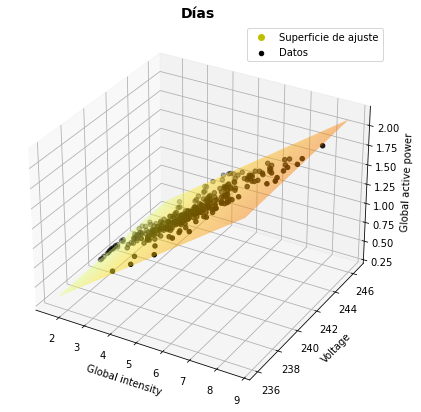

Coeficients are : [ 0.24235  0.00617 -1.51527]
Sigma_Coeficients are : [0.00047 0.00044 0.10512]
Error on fit is =0.011960661200757172


In [126]:
figura3 = plt.figure(figsize=(7,7))
ax=plt.axes(projection='3d')
x=np.linspace(*dias_I)
y=np.linspace(*dias_V)             
xx, yy =np.meshgrid(x,y)
z= F((xx,yy),*relacion3_dias)      

scatter = ax.scatter3D(dias_intensidad,dias_voltage,dias_activ,color = 'black')
ax.plot_surface(xx,yy,z,alpha= 0.5,cmap='Wistia')

plt.title("Días",fontsize=14,fontweight="bold")
plt.xlabel("Global intensity")
plt.ylabel("Voltage")
ax.set_zlabel("Global active power")

legends = plt.Line2D([0],[0], linestyle="none", color='y', marker = 'o') 
ax.legend([legends,scatter], ['Superficie de ajuste','Datos'], numpoints = 1)
plt.show()

get_fit2(F,(dias_intensidad, dias_voltage),dias_activ,5)

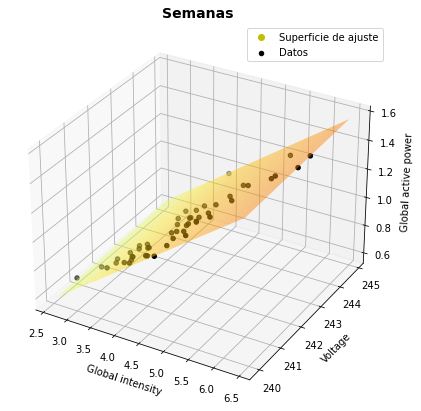

Coeficients are : [ 0.24502  0.00695 -1.71494]
Sigma_Coeficients are : [0.00117 0.00094 0.22568]
Error on fit is =0.00568761168867203


In [127]:
figura4 = plt.figure(figsize=(7,7))
ax=plt.axes(projection='3d')
x=np.linspace(*semanas_I)
y=np.linspace(*semanas_V)             
xx, yy =np.meshgrid(x,y)
z= F((xx,yy),*relacion3_semanas)      

scatter = ax.scatter3D(intensity_semana,voltage_semana,activ_semana,color = 'black')
ax.plot_surface(xx,yy,z,alpha= 0.5,cmap='Wistia')

plt.title("Semanas",fontsize=14,fontweight="bold")
plt.xlabel("Global intensity")
plt.ylabel("Voltage")
ax.set_zlabel("Global active power")

legends = plt.Line2D([0],[0], linestyle="none", color='y', marker = 'o') 
ax.legend([legends,scatter], ['Superficie de ajuste','Datos'], numpoints = 1)
plt.show()

get_fit2(F,(intensity_semana, voltage_semana),activ_semana,5)

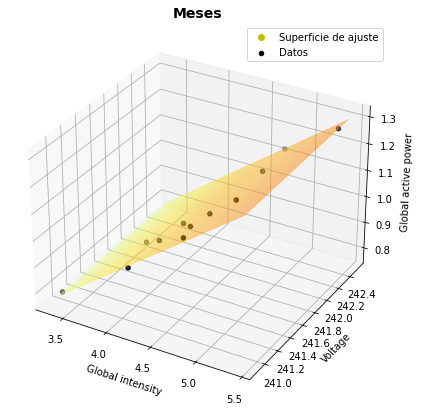

Coeficients are : [ 0.24525  0.00808 -1.9891 ]
Sigma_Coeficients are : [0.00241 0.00247 0.58942]
Error on fit is =0.002806007767506809


In [128]:
figura5 = plt.figure(figsize=(7,7))
ax=plt.axes(projection='3d')
x=np.linspace(*meses_I)
y=np.linspace(*meses_V)             
xx, yy =np.meshgrid(x,y)
z= F((xx,yy),*relacion3_semanas)      

scatter = ax.scatter3D(intensity_mes,voltage_mes,activ_mes,color = 'black')
ax.plot_surface(xx,yy,z,alpha= 0.5,cmap='Wistia')

plt.title("Meses",fontsize=14,fontweight="bold")
plt.xlabel("Global intensity")
plt.ylabel("Voltage")
ax.set_zlabel("Global active power")

legends = plt.Line2D([0],[0], linestyle="none", color='y', marker = 'o') 
ax.legend([legends,scatter], ['Superficie de ajuste','Datos'], numpoints = 1)
plt.show()

get_fit2(F,(intensity_mes, voltage_mes),activ_mes,5)

## Análisis de resultados
En la primera relación en cualquiera de las escalas, tenemos una regresión acertada. Además de eso se observa que en la **figura1**, para la escala de meses hay un error mínimo a comparación de la escala de días y semanas, sin embargo para ninguna de las escalas el error nunca es mayor a 0.0226 por lo cual se puede concluir que se tiene un vinculo dependiente y creciente entre estas mismas variables de esta primera relación.


En la segunda relación, en cualquiera de las escalas, nuestra regresión es muy desacertada debido al comportamiento volátil de los datos de energía activa respecto a los de voltaje como se muestra en las gráficas de la **figura2**, por tanto, se concluye que no hay un vinculo dependiente entre ambas variables para ninguna de las escalas.


En la relación 3 tiene una estructura diferente a la que se trabajó en las relaciones anteriores debido a que se tienen una variable depende de dos variables independientes por ello se trabajaron gráficas en 3R para las cuales la superficie de regresión con menor erro fue en la escala de meses al igual que en la primera relación con 0.0028.
Se concluye que la mejor relación fue la tercera, seguida de la primera. Respecto a escala de trabajo, la de mes en las relaciones primera y tercera fue la mejor debido a su bajo porcentaje de error y afinación con la regresión y la peor es en dias debido a que es 5 veces mayor. En cuanto a la relación 2, no hay una relación lineal debido a la volatilidad de los datos, esto se denota en los porcentajes de error y la afinidad de los puntos respecto a la linea de tendencia.